In [2]:
## which state has the most sightings? over time?
## most frequent shape by state?
## timeline changes? trends?
## sighting density around airports/afb

In [3]:
import os
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st2

In [4]:
ufo_df = pd.read_csv('resources/ufo.csv', low_memory=False)
ufo_df2 = pd.read_csv('resources/ufo2.csv', low_memory=False)

In [5]:
nRow, nCol = ufo_df2.shape
print(f'This csv has {nRow} rows and {nCol} columns')

This csv has 70388 rows and 12 columns


In [6]:
#split datetime into date and time and move them to the front of the df

ufo_df2[['date', 'time']] = ufo_df2.datetime.str.split(' ', expand=True)

#ufo_df2['date'] = pd.to_datetime(ufo_df2.date, infer_datetime_format = True)
#display(ufo_df2.head())

first_column = ufo_df2.pop('time')
ufo_df2.insert(0, 'time', first_column)

first_column = ufo_df2.pop('date')
ufo_df2.insert(0, 'date', first_column)

ufo_df2.pop('datetime')



ufo_df2.head()

,date,time,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,region
0,5/8/2014,0:00,memphis,tn,us,rectangle,900,15 minutes,Standing at my window around 0:00 brilliantly ...,5/8/2014,35.1494444,-90.048889,Southeast
1,5/7/2014,23:30,san isidro,nm,us,unknown,15,15 seconds,2 red lights gliding across sky&#44 then green...,5/8/2014,35.563363,-106.770591,Southwest
2,5/7/2014,21:20,hillsboro,mo,us,fireball,360,4-6 minutes,Round slow moving silent ball looked like a ca...,5/8/2014,38.2322222,-90.562778,Midwest
3,5/7/2014,21:10,naugatuck,ct,us,unknown,300,5 minutes,Large formation of lights in western sky&#44 f...,5/8/2014,41.4858333,-73.051111,Northeast
4,5/7/2014,21:00,theodore,al,us,circle,120,few minutes,Driving home and entered my neighborhood and s...,5/8/2014,30.5475,-88.175278,Southeast


In [7]:
ufo_df2['datetime64'] = pd.to_datetime(ufo_df2.date, infer_datetime_format = True)
display(ufo_df2.head())

ufo_df2.sort_values(by=['datetime64'])

,date,time,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,region,datetime64
0,5/8/2014,0:00,memphis,tn,us,rectangle,900,15 minutes,Standing at my window around 0:00 brilliantly ...,5/8/2014,35.1494444,-90.048889,Southeast,2014-05-08
1,5/7/2014,23:30,san isidro,nm,us,unknown,15,15 seconds,2 red lights gliding across sky&#44 then green...,5/8/2014,35.563363,-106.770591,Southwest,2014-05-07
2,5/7/2014,21:20,hillsboro,mo,us,fireball,360,4-6 minutes,Round slow moving silent ball looked like a ca...,5/8/2014,38.2322222,-90.562778,Midwest,2014-05-07
3,5/7/2014,21:10,naugatuck,ct,us,unknown,300,5 minutes,Large formation of lights in western sky&#44 f...,5/8/2014,41.4858333,-73.051111,Northeast,2014-05-07
4,5/7/2014,21:00,theodore,al,us,circle,120,few minutes,Driving home and entered my neighborhood and s...,5/8/2014,30.5475,-88.175278,Southeast,2014-05-07


,date,time,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,region,datetime64
70387,6/1/1910,15:00,wills point,tx,us,cigar,120,2 minutes,Cigar shaped object moving from West to East,4/16/2005,32.7091667,-96.008056,Southwest,1910-06-01
70386,6/11/1920,21:00,cicero,in,us,unknown,60,1 minute,((NUFORC Note: Probable hoax. Note date. PD...,5/12/2009,40.1238889,-86.013333,Midwest,1920-06-11
70385,12/28/1925,18:00,atkinson (6 miles north of),il,us,disk,60,1 minute,Young boy witnesses disc in sky above Illinois...,5/11/2005,41.4208333,-90.015000,Midwest,1925-12-28
70384,7/5/1929,14:00,buchanan (or burns),or,us,disk,60,1min,we were traveling east of burns&#44clmbing up ...,8/16/2002,43.6425,-118.627500,West,1929-07-05
70383,6/1/1930,22:00,ithaca/freeville,ny,us,triangle,1200,20 mins,Very Large Triangle Shapped Object,1/19/2005,42.509167,-76.393804,Northeast,1930-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,5/7/2014,9:30,port richey,fl,us,unknown,1,1 second,Sonic boom denied by military source per McDil...,5/8/2014,28.2713889,-82.719722,Southeast,2014-05-07
11,5/7/2014,3:30,calera,al,us,circle,240,3-4 minutes,Orange/red sphere with blue or green outline o...,5/8/2014,33.1027778,-86.753611,Southeast,2014-05-07
12,5/7/2014,0:00,detroit,mi,us,fireball,180,3 minutes,Fire balls in detroit sky.,5/8/2014,42.3313889,-83.045833,Midwest,2014-05-07
6,5/7/2014,20:30,visalia,ca,us,fireball,180,3 minutes,Strange&#44 slowly moving fireball like object...,5/8/2014,36.3302778,-119.291111,West,2014-05-07


In [8]:
#convert 'duration' column from object to float64

ufo_df2.rename(columns = {'duration (seconds)':'duration_sec'}, inplace = True)

ufo_df2["duration_sec"] = pd.to_numeric(ufo_df2.duration_sec, errors='coerce')

ufo_df2['year'] = pd.DatetimeIndex(ufo_df2['datetime64']).year
ufo_df2['month'] = pd.DatetimeIndex(ufo_df2['datetime64']).month
ufo_df2['day'] = pd.DatetimeIndex(ufo_df2['datetime64']).day
ufo_df2['weekday'] = pd.DatetimeIndex(ufo_df2['datetime64']).day_name()
ufo_df2.head()

,date,time,city,state,country,shape,duration_sec,duration (hours/min),comments,date posted,latitude,longitude,region,datetime64,year,month,day,weekday
0,5/8/2014,0:00,memphis,tn,us,rectangle,900.0,15 minutes,Standing at my window around 0:00 brilliantly ...,5/8/2014,35.1494444,-90.048889,Southeast,2014-05-08,2014,5,8,Thursday
1,5/7/2014,23:30,san isidro,nm,us,unknown,15.0,15 seconds,2 red lights gliding across sky&#44 then green...,5/8/2014,35.563363,-106.770591,Southwest,2014-05-07,2014,5,7,Wednesday
2,5/7/2014,21:20,hillsboro,mo,us,fireball,360.0,4-6 minutes,Round slow moving silent ball looked like a ca...,5/8/2014,38.2322222,-90.562778,Midwest,2014-05-07,2014,5,7,Wednesday
3,5/7/2014,21:10,naugatuck,ct,us,unknown,300.0,5 minutes,Large formation of lights in western sky&#44 f...,5/8/2014,41.4858333,-73.051111,Northeast,2014-05-07,2014,5,7,Wednesday
4,5/7/2014,21:00,theodore,al,us,circle,120.0,few minutes,Driving home and entered my neighborhood and s...,5/8/2014,30.5475,-88.175278,Southeast,2014-05-07,2014,5,7,Wednesday


In [9]:
ufo_df2.dtypes

date                            object
time                            object
city                            object
state                           object
country                         object
shape                           object
duration_sec                   float64
duration (hours/min)            object
comments                        object
date posted                     object
latitude                        object
longitude                      float64
region                          object
datetime64              datetime64[ns]
year                             int64
month                            int64
day                              int64
weekday                         object
dtype: object

In [10]:
ufo_df2['shape'].value_counts()

light        14576
triangle      7043
circle        6555
fireball      5529
unknown       4944
other         4854
sphere        4702
disk          4482
oval          3268
formation     2158
cigar         1781
changing      1720
flash         1166
rectangle     1152
cylinder      1120
diamond       1013
chevron        868
teardrop       642
egg            639
cone           265
cross          200
delta            6
crescent         2
round            2
hexagon          1
flare            1
pyramid          1
changed          1
Name: shape, dtype: int64

In [11]:
ufo_df2['state'].value_counts().head()

ca    9584
wa    4240
fl    4175
tx    3638
ny    3195
Name: state, dtype: int64

In [12]:
ufo_df2.nunique()

date                    10104
time                     1374
city                    15355
state                      52
country                     1
shape                      28
duration_sec              490
duration (hours/min)     7297
comments                70118
date posted               315
latitude                15175
longitude               15969
region                      5
datetime64              10104
year                       85
month                      12
day                        31
weekday                     7
dtype: int64

In [13]:
ufo_df2['date'].value_counts().head()

7/4/2010      198
7/4/2012      181
11/16/1999    173
7/4/2013      171
7/4/2011      143
Name: date, dtype: int64

In [14]:
bins = [1940, 1959, 1969, 1979, 1989, 1999, 2009, 2015]


labels = ['1950-1959', '1960-1969', '1970-1979', '1980-1989','1990-1999','2000-2009','2010-2015']

ufo_df2['Date Bin'] = pd.cut(ufo_df2.year, bins, labels=labels, right=False)

date_shape = ufo_df2.groupby(['Date Bin']).size().reset_index(name='count')
date_shape

         

,Date Bin,count
0,1950-1959,421
1,1960-1969,1066
2,1970-1979,1982
3,1980-1989,1773
4,1990-1999,5843
5,2000-2009,31552
6,2010-2015,27737


In [15]:
date_shape = ufo_df2.groupby(['Date Bin']).size()
date_shape

Date Bin
1950-1959      421
1960-1969     1066
1970-1979     1982
1980-1989     1773
1990-1999     5843
2000-2009    31552
2010-2015    27737
dtype: int64

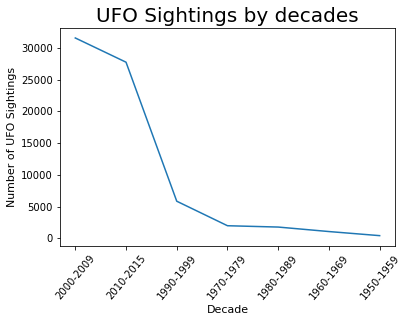

In [102]:
group = ufo_df2["Date Bin"].value_counts()
group.plot(kind = "line")
plt.xticks(rotation=50)
plt.xticks(rotation=50)

plt.title("UFO Sightings by decades", fontdict= {'fontsize':20})
plt.ylabel("Number of UFO Sightings",fontdict= {'fontsize':11})
plt.xlabel("Decade",fontdict= {'fontsize':11})
plt.show()


In [118]:
bins = [1940, 1959, 1969, 1979, 1989, 1999, 2009, 2015]


labels = ['1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2015']

ufo_df['Date Bin'] = pd.cut(ufo_df2.datetime64.dt.year, bins, labels=labels, right=False)

date_region = ufo_df2.groupby(['Date Bin','region']).size().reset_index(name='count').set_index('region')
date_region.head()


,Date Bin,count
region,,
Midwest,1950-1959,88
Northeast,1950-1959,93
Southeast,1950-1959,53
Southwest,1950-1959,70
West,1950-1959,116


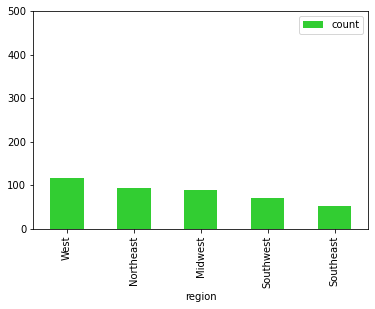

In [120]:
fifty_df = date_region.loc[date_region['Date Bin'] == '1950-1959'].sort_values(by = ['count'], ascending = False)
fifty_df.plot(kind = "bar",color="limegreen")
axes = plt.gca()
axes.set_ylim([0,500])
plt.savefig("Images/1950img.png")



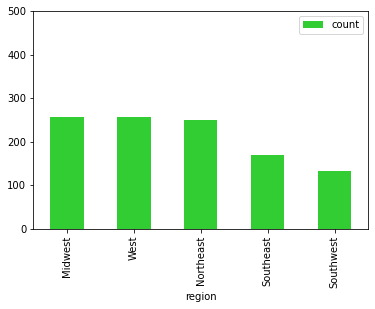

In [124]:
sixty_df = date_region.loc[date_region['Date Bin'] == '1960-1969'].sort_values(by = ['count'], ascending = False)
sixty_df.plot(kind = "bar",color="limegreen")
axes = plt.gca()
axes.set_ylim([0,500])
plt.savefig("Images/1960img.png")

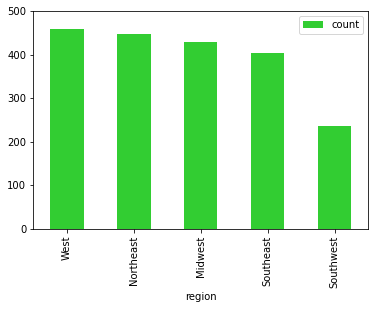

In [126]:
seventy_df = date_region.loc[date_region['Date Bin'] == '1970-1979'].sort_values(by = ['count'], ascending = False)
seventy_df.plot(kind = "bar",color="limegreen")
axes = plt.gca()
axes.set_ylim([0,500])

plt.savefig("Images/1970img.png")

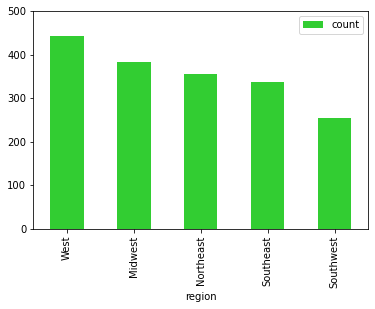

In [127]:
eighty_df = date_region.loc[date_region['Date Bin'] == '1980-1989'].sort_values(by = ['count'], ascending = False)
eighty_df.plot(kind = "bar",color="limegreen")
axes = plt.gca()
axes.set_ylim([0,500])

plt.savefig("Images/1980img.png")

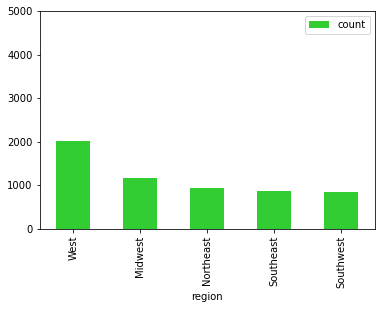

In [128]:
ninty_df = date_region.loc[date_region['Date Bin'] == '1990-1999'].sort_values(by = ['count'], ascending = False)
ninty_df.plot(kind = "bar",color="limegreen")
axes = plt.gca()
axes.set_ylim([0,5000])

plt.savefig("Images/1990img.png")

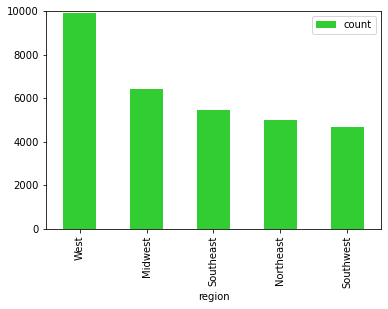

In [129]:
thousands_df = date_region.loc[date_region['Date Bin'] == '2000-2009'].sort_values(by = ['count'], ascending = False)
thousands_df.plot(kind = "bar",color="limegreen")
axes = plt.gca()
axes.set_ylim([0,10000])

plt.savefig("Images/1990img.png")

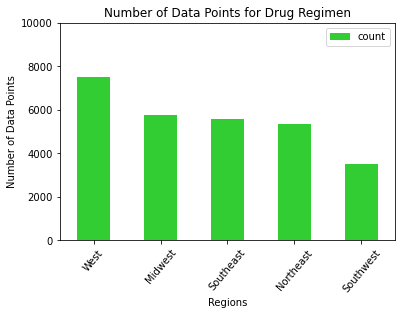

In [130]:
thousand_ten_df = date_region.loc[date_region['Date Bin'] == '2010-2015'].sort_values(by = ['count'], ascending = False)
thousand_ten_df.plot(kind = "bar",color="limegreen")
axes = plt.gca()
axes.set_ylim([0,10000])
plt.xticks(rotation=50)
plt.xlabel("Regions")
plt.ylabel("Number of Data Points")
plt.title('Number of Data Points for Drug Regimen')


plt.savefig("Images/1990img.png")

ValueError: shape mismatch: objects cannot be broadcast to a single shape

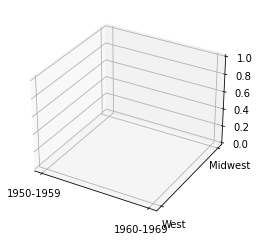

In [116]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

index = date_region.index
columns = date_region.columns
for c, k in zip(index, columns):
    # Generate the random data for the y=k 'layer'.
    xs = ['1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2015']
    ys = ['West','Midwest','North East', 'Southwest','Southeast']

    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    cs = [c] * len(xs)
   

    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# On the y axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)

plt.show()

In [27]:
groups = ufo_df2.groupby(['region', pd.cut(ufo_df2.year, bins)])
groups.size().unstack()

year,"(1940, 1959]","(1959, 1969]","(1969, 1979]","(1979, 1989]","(1989, 1999]","(1999, 2009]","(2009, 2015]"
region,,,,,,,
Midwest,103,267,453,368,1708,6606,5000
Northeast,102,271,464,354,1202,5414,4598
Southeast,56,192,418,340,1210,5811,4845
Southwest,75,143,249,266,1138,4924,2938
West,130,280,472,443,2863,10155,6389


In [ ]:
counts = group['Drug Regimen'].value_counts()
x_axis = np.arange(len(counts))
plt.bar(x_axis, counts, color="orange",align="center" )

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)
plt.xticks(rotation=50)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title('Number of Data Points for Drug Regimen')
plt.show()


C:\Users\bmoya\AppData\Local\Temp/ipykernel_41808/3533164908.py:29: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = plt.figure().gca(projection='3d')


ValueError: Argument Z must be 2-dimensional.

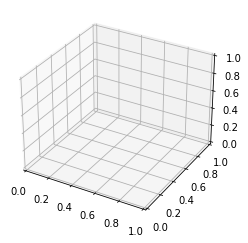

In [141]:

def plottable_3d_info(date_region: pd.DataFrame):
    """
    Transform Pandas data into a format that's compatible with
    Matplotlib's surface and wireframe plotting.
    """
    index = date_region.index
    columns = date_region.columns

    x, y = np.meshgrid(np.arange(len(columns)), np.arange(len(index)))
    z = np.array([[date_region[c][i] for c in columns] for i in index])
    
    xticks = dict(ticks=np.arange(len(columns)), labels=columns)
    yticks = dict(ticks=np.arange(len(index)), labels=index)
    
    return x, y, z, xticks, yticks


### Compose your data.
the_data = pd.DataFrame(date_region)
    
index=['triangle', 'square', 'hexagon'],
columns=['sodium', 'nylon 11', 'nylon 12', 'abs'],


### Transform to Matplotlib friendly format.
x, y, z, xticks, yticks = plottable_3d_info(the_data)

### Set up axes and put data on the surface.
axes = plt.figure().gca(projection='3d')
axes.plot_surface(x, y, z)

### Customize labels and ticks (only really necessary with
### non-numeric axes).
axes.set_xlabel('material')
axes.set_ylabel('shape')
axes.set_zlabel('USD per item')
axes.set_zlim3d(bottom=0)
plt.xticks(**xticks)
plt.yticks(**yticks)

plt.show()